## Companion notebook for "Rethinking Statistical Significance: A Critical Look at p-Values in Bioimage Analysis"

In this notebook, you will be able to explore the data and graphs shown in the paper titled "Rethinking Statistical Significance: A Critical Look at p-Values in Bioimage Analysis".

If you are interested in taking a look at the original images of Fascin knockdown (KD) HeLa cells under different experimental conditions from [Lawson et al., 2022](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9427113/), these are freely available on the [Image Data Resource](https://idr.openmicroscopy.org) under accession number IDR0139. We selected four wells (J05, O02, E22, L08) from plate number 1093711385 for use in this work.

We took into consideration three channels for each image: cell nuclei (Hoescht), Fascin and actin. Moreover, we compared data from a specific pharmacological compound (SN0212398523), with three controls: untreated (negative control), DMSO (vehicle control), and Leptomycin b (positive control). Image analysis was performed in CellProfiler, with a pipeline available in associated [GitHub repo](https://github.com/djpbarry/dont-trust-p-values).

#### Import utility functions

In [5]:
import sys
 
# setting path
sys.path.append('../')
 
# importing
from utility_functions import *

#### Set up parameters for plots

In [8]:
plt.rcParams['font.size'] = 28
color_dict = {'SN0212398523': 'orange', 'Untreated': 'blue', 'DMSO': 'gray', 'Leptomycin b': 'purple'}

#### Set up variables

In [9]:
plate_number = 1093711385
treatment_col = 'Treatment'
variable_of_interest = 'Fascin_Ratio'
treatments_to_compounds = {'Treated': 'SN0212398523', 'Negative Control': 'Untreated', 'Neutral Control': 'DMSO',
                           'Stimulator Control': 'Leptomycin b'}
dunn_pairs = [('Untreated', 'DMSO'), ('DMSO', 'SN0212398523'), ('SN0212398523', 'Leptomycin b'),
              ('Untreated', 'SN0212398523')]

#### Set up input and output folders

In [10]:
directories = ('./inputs/idr', './outputs/plots', './outputs/data')

for d in directories:
    if not os.path.exists(d):
        os.makedirs(d)

#### Download plate annotations in the input folder

In [12]:
idr_annotations_file_path = './inputs/idr/idr0139-screenA-annotation.csv'
idr_annotations_url = 'https://raw.githubusercontent.com/IDR/idr0139-lawson-fascin/main/screenA/idr0139-screenA-annotation.csv'

download_csv(idr_annotations_file_path, idr_annotations_url)

File not found. Downloading from https://raw.githubusercontent.com/IDR/idr0139-lawson-fascin/main/screenA/idr0139-screenA-annotation.csv
File downloaded successfully.


#### Load CellProfile analysis output

In [16]:
annotations = load_and_prepare_data(idr_annotations_file_path, plate_number)
image_data = pd.read_csv('./inputs/cell_profiler_outputs/Image.csv')
nuc_data = pd.read_csv('./inputs/cell_profiler_outputs/Nuclei.csv')
cyto_data = pd.read_csv('./inputs/cell_profiler_outputs/Cytoplasm.csv')
treatments = annotations.set_index('Well')['Control Type'].to_dict()

#### Select data subset

In [18]:
data_subset = prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds,
                           ['J05', 'O02', 'E22', 'L08'])

#### Plot figures
##### Figure 1B

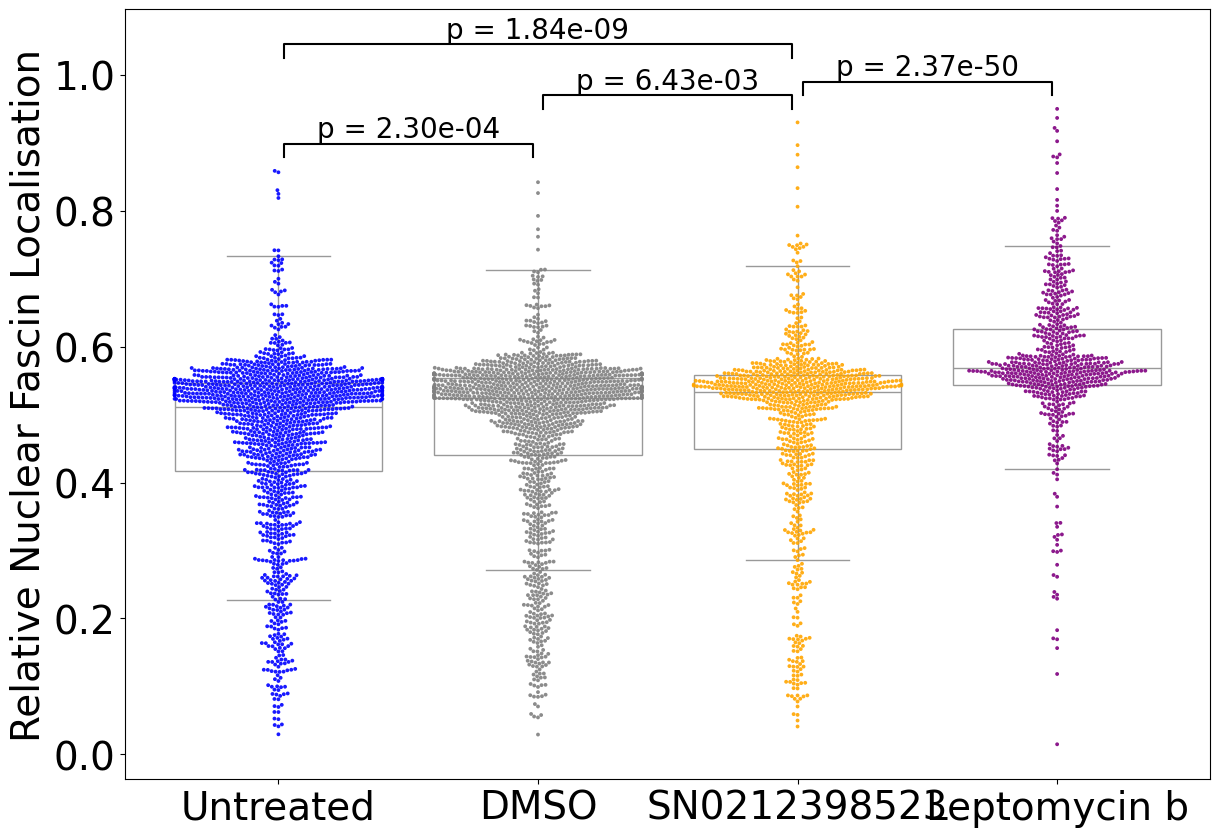

In [29]:
fig_width = 14
fig_height = 10
plot_rows = 1
plot_cols = 1

generate_swarmplot(fig_width, fig_height, plot_rows, plot_cols, ['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b'], 1, -1,
                   data_subset, color_dict, treatment_col, variable_of_interest, dunn_pairs,
                   treatments_to_compounds, 'Relative Nuclear Fascin Localisation')


##### Figure 2A

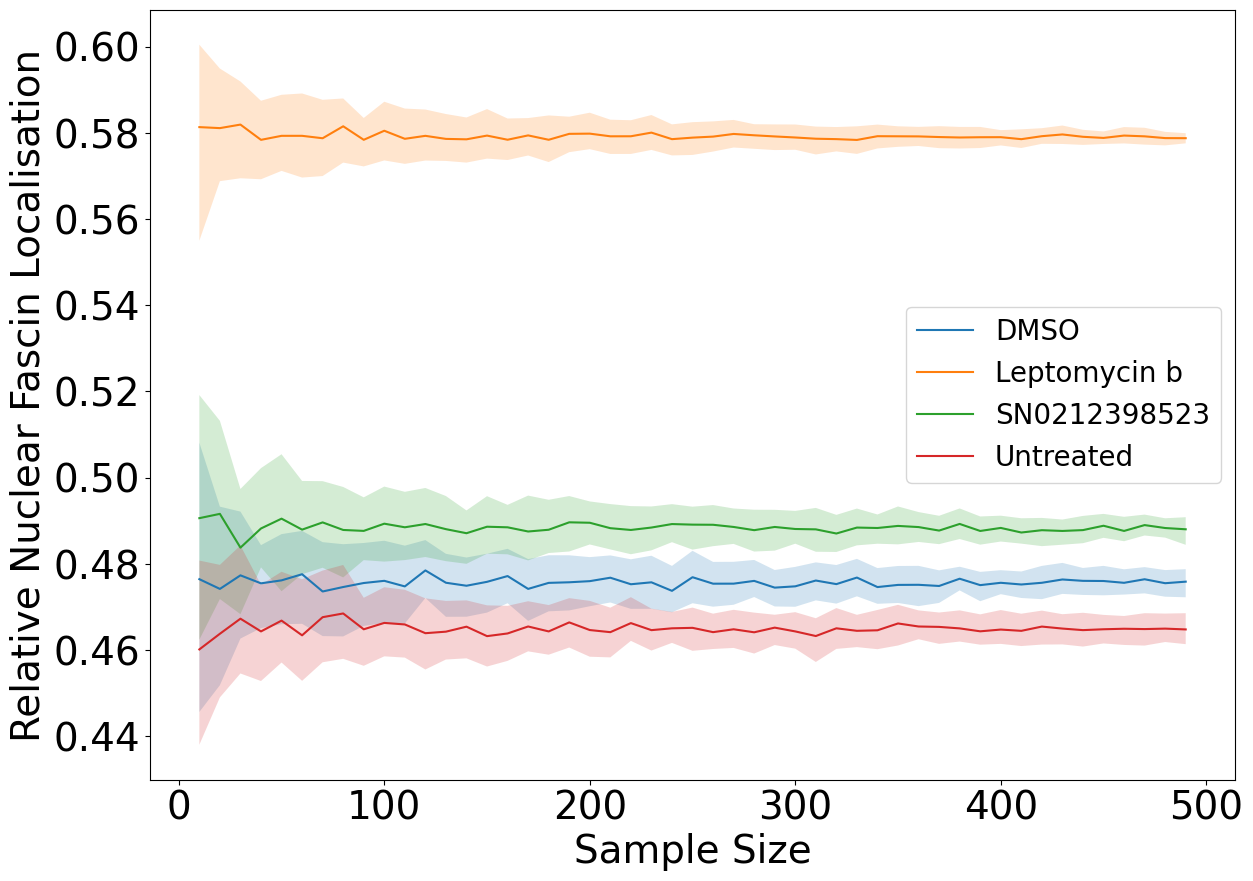

In [36]:
sample_sizes = [*range(10, 500, 10)]
num_iterations = 100

plot_mean_v_sample_size(sample_sizes, num_iterations, data_subset, treatment_col, variable_of_interest, 'Relative Nuclear Fascin Localisation')

#### Figure 2B

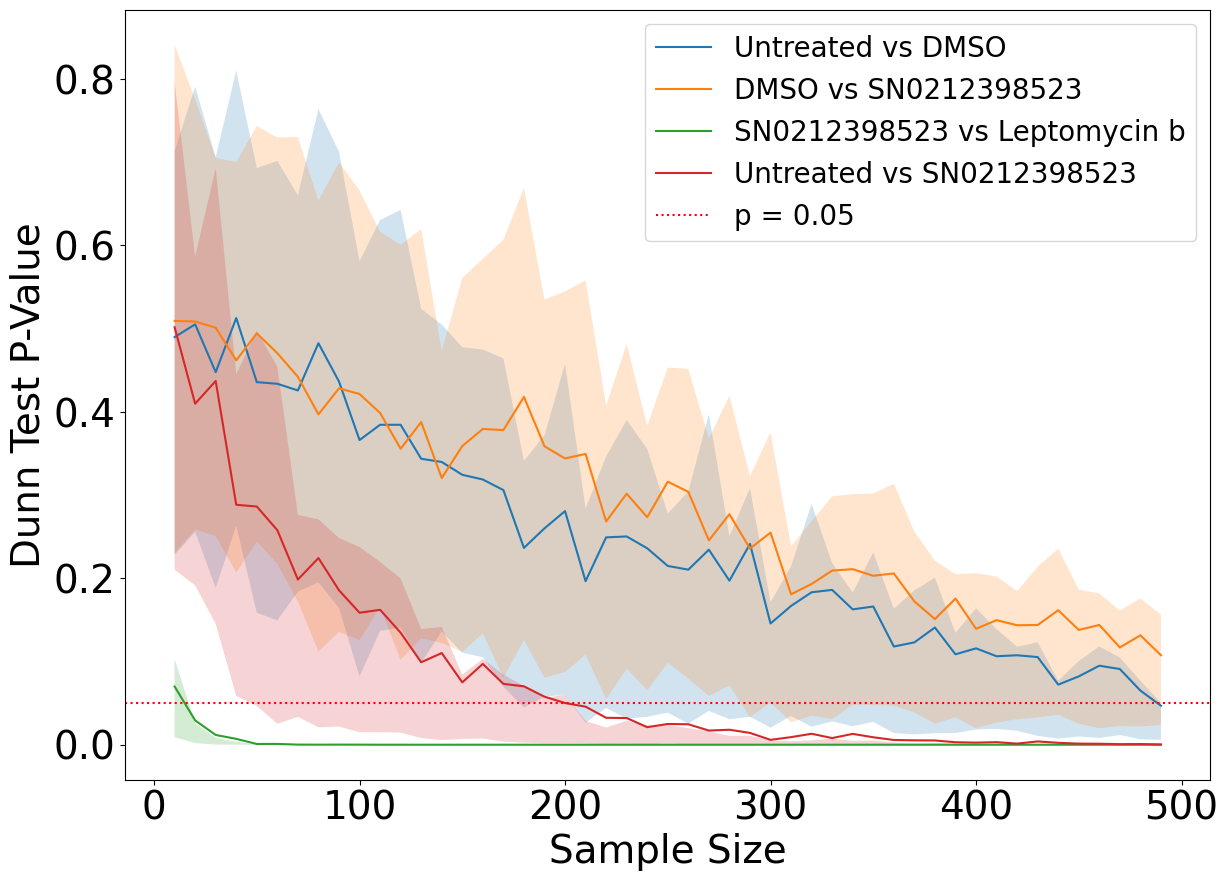

In [35]:
sample_sizes = [*range(10, 500, 10)]
num_iterations = 100

plot_p_v_sample_size(sample_sizes, num_iterations, data_subset, treatment_col, variable_of_interest, dunn_pairs)

##### Figure 2C-F

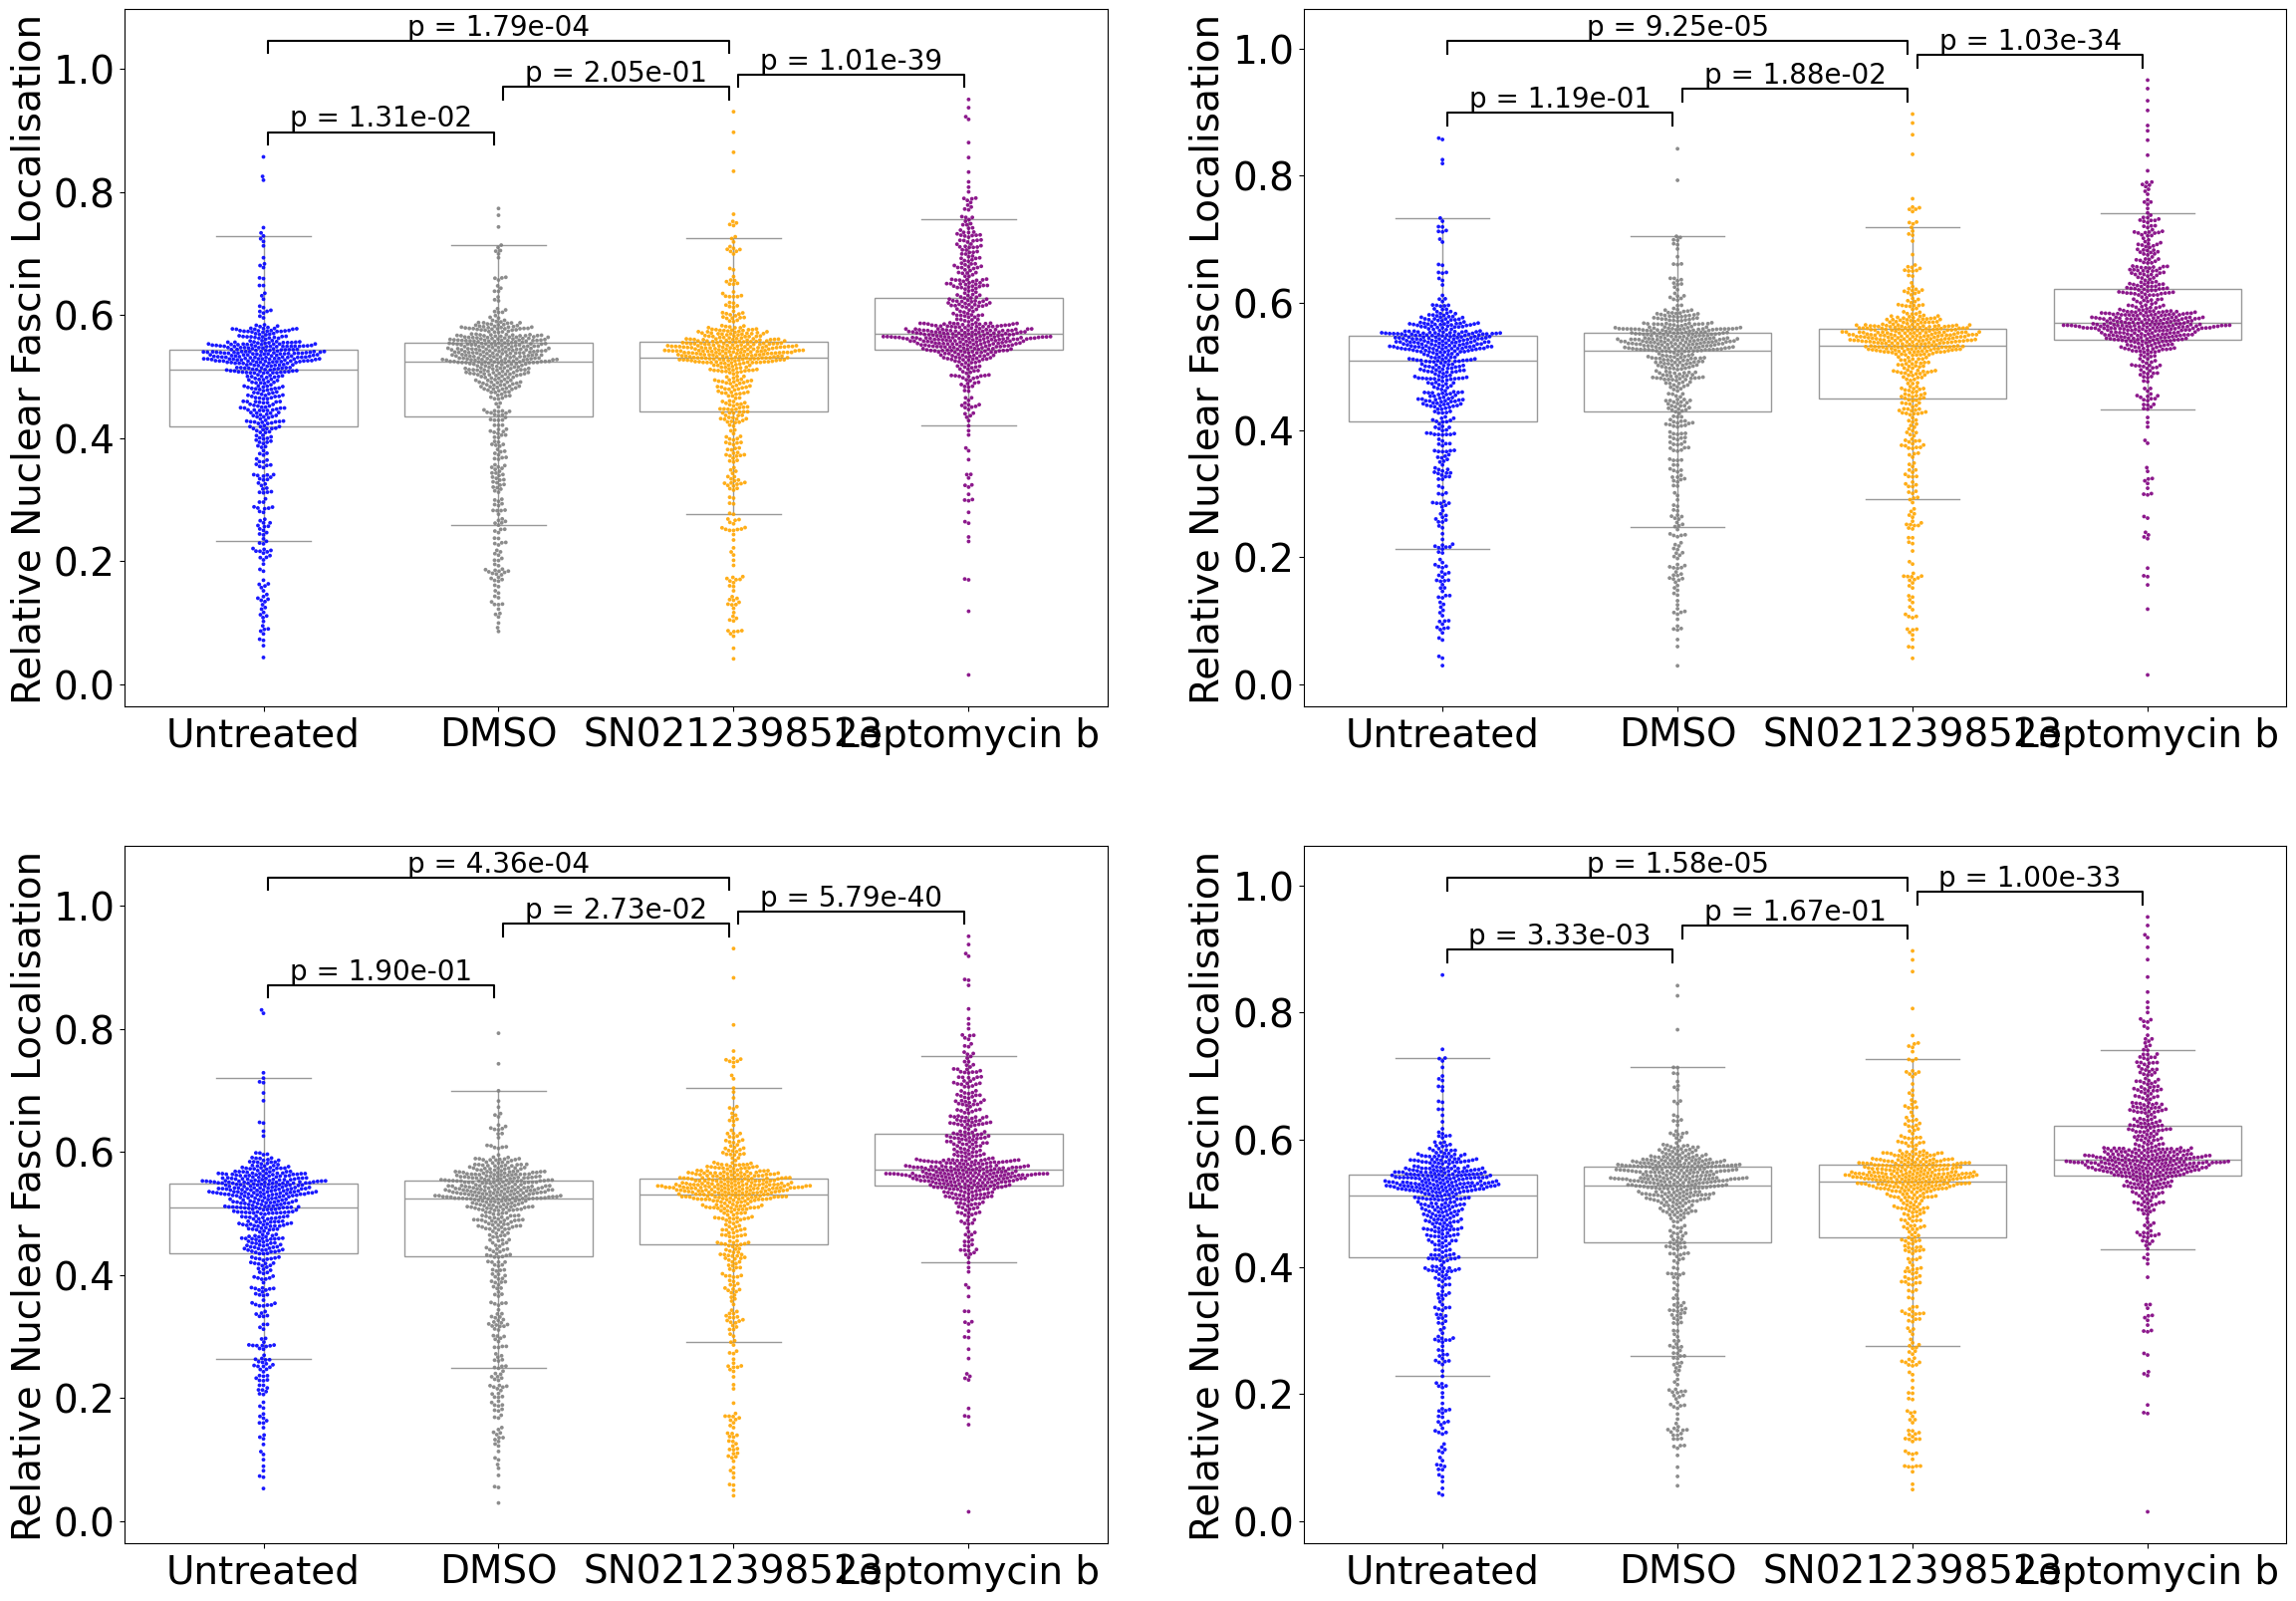

In [34]:
fig_width = 28
fig_height = 20
plot_rows = 2
plot_cols = 2

generate_swarmplot(fig_width, fig_height, plot_rows, plot_cols, ['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b'],
                   4, 500, data_subset, color_dict, treatment_col, variable_of_interest, dunn_pairs,
                   treatments_to_compounds,'Relative Nuclear Fascin Localisation')